In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
(X_train,Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[1].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

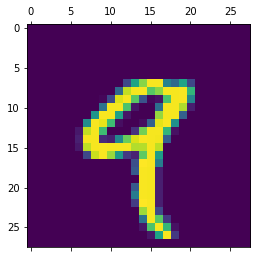

In [ ]:
plt.matshow(X_train[4])

In [ ]:
Y_train[4]

9

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)


In [ ]:
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4715 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3041 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9255


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9259


[0.26562753319740295, 0.9258999824523926]

In [ ]:
y_pred=model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 1s 1ms/step


array([1.6718069e-02, 2.6587264e-07, 5.6199875e-02, 9.4661254e-01,
       2.4508936e-03, 1.0565163e-01, 1.6298645e-06, 9.9970430e-01,
       9.0525076e-02, 6.1691588e-01], dtype=float32)

In [ ]:
y_pred[0].argmax()

7

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    3,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    7,  925,   18,    9,    5,   13,    9,   40,    3],
       [   1,    0,   18,  930,    1,   19,    2,    8,   24,    7],
       [   1,    1,    4,    1,  922,    0,   10,    3,   12,   28],
       [   7,    3,    3,   37,   11,  769,   18,    5,   33,    6],
       [   9,    3,    7,    1,    7,   10,  915,    2,    4,    0],
       [   1,    6,   24,   10,    9,    1,    0,  940,    3,   34],
       [   5,    7,    6,   19,    9,   22,    9,    9,  881,    7],
       [   9,    7,    2,   10,   37,    6,    0,   19,   11,  908]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

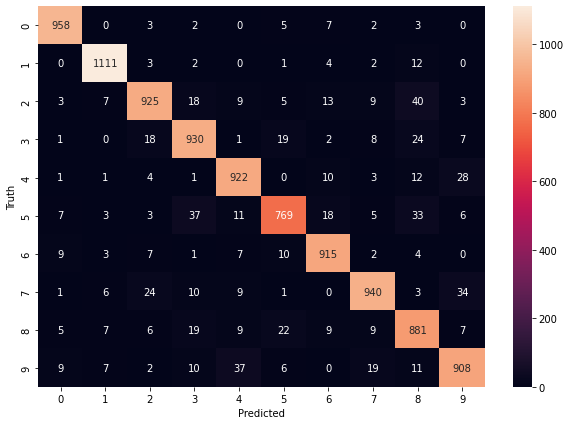

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2715 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1213 - accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0843 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0650 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0515 - accuracy: 0.9840


In [ ]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9781


[0.07229139655828476, 0.9781000018119812]

In [ ]:
y_pred=model.predict(X_test_flattened)
y_pred[0]

313/313 [==============================] - 1s 3ms/step


array([4.7630547e-03, 8.5114943e-06, 2.6952204e-01, 8.2930040e-01,
       1.1639172e-06, 4.6857749e-03, 5.6109268e-08, 9.9996269e-01,
       3.7924424e-02, 2.2747622e-01], dtype=float32)

In [ ]:
y_pred[0].argmax()

7

In [ ]:
y_pred_labels=[np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    1,    0,    3,    1,    1,    2,    4],
       [   0, 1118,    3,    1,    0,    1,    4,    2,    6,    0],
       [   7,    1,  996,    4,    3,    1,    5,    6,    9,    0],
       [   1,    0,    4,  988,    0,    2,    0,    4,    8,    3],
       [   4,    0,    1,    1,  959,    1,    4,    4,    1,    7],
       [   3,    0,    0,    6,    1,  870,    3,    0,    7,    2],
       [   6,    3,    0,    1,    3,    3,  938,    0,    4,    0],
       [   1,    1,    6,    1,    2,    0,    0, 1008,    3,    6],
       [   5,    0,    3,    2,    3,    2,    0,    1,  955,    3],
       [   2,    2,    0,    3,   12,    2,    0,    2,    5,  981]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

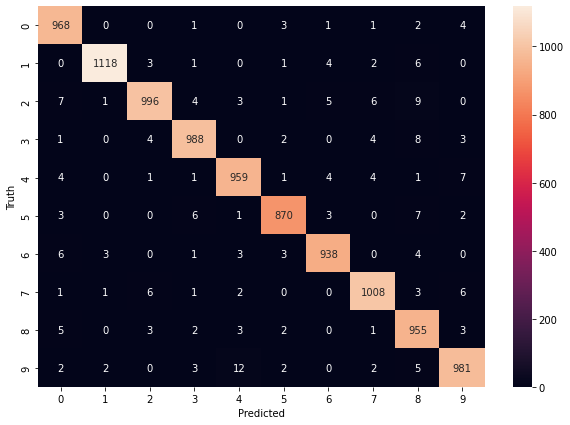

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')